In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import scipy
import math
import collections

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
file=pd.read_csv('Smart_City_index_headers.csv')
file.info()
file.isnull().sum() 
file.isna().sum() / len(file)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Id                                 102 non-null    int64 
 1   City                               102 non-null    object
 2   Country                            102 non-null    object
 3   Smart_Mobility                     102 non-null    int64 
 4   Smart_Environment                  102 non-null    int64 
 5   Smart_Government                   102 non-null    int64 
 6   Smart_Economy                      102 non-null    int64 
 7   Smart_People                       102 non-null    int64 
 8   Smart_Living                       102 non-null    int64 
 9   SmartCity_Index                    102 non-null    int64 
 10  SmartCity_Index_relative_Edmonton  102 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 8.9+ KB


Id                                   0.0
City                                 0.0
Country                              0.0
Smart_Mobility                       0.0
Smart_Environment                    0.0
Smart_Government                     0.0
Smart_Economy                        0.0
Smart_People                         0.0
Smart_Living                         0.0
SmartCity_Index                      0.0
SmartCity_Index_relative_Edmonton    0.0
dtype: float64

In [6]:
file.columns

Index(['Id', 'City', 'Country', 'Smart_Mobility ', 'Smart_Environment',
       'Smart_Government ', 'Smart_Economy ', 'Smart_People', 'Smart_Living',
       'SmartCity_Index', 'SmartCity_Index_relative_Edmonton'],
      dtype='object')

In [8]:
file.replace(" ", "")
file.columns=file.columns.str.replace(' ', '')
sci=file.drop(columns='Id')
sci=sci.drop(columns='SmartCity_Index_relative_Edmonton', ).sort_values('SmartCity_Index', ascending=False)

In [12]:
numeric_cols = sci.select_dtypes(include=[np.number])

scimean = sci.groupby('Country')[numeric_cols.columns].median().astype(int).sort_values('SmartCity_Index', ascending=False).head(10)

scimean.style.background_gradient(cmap="GnBu")

,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index
Country,,,,,,,
Netherlands,7540,5558,8528,8095,7098,7280,7311
Norway,6486,6989,7018,4925,7822,9090,7088
Canada,6727,4780,6510,6782,6930,9920,6866
Singapore,5790,4344,5560,5535,9695,10000,6813
Denmark,5876,8207,7540,5182,6386,7200,6803
Austria,5683,7608,6232,5415,8580,7500,6771
Sweden,4683,8296,7840,5980,6743,7730,6771
Switzerland,5326,8775,5591,6265,6425,7960,6707
Finland,5124,6519,6121,8155,5944,8710,6689


In [14]:
sci.describe()

,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,5759.401961,5943.500000,5893.803922,6131.803922,5874.049020,6377.039216,5991.911765
std,1214.030137,1724.032171,1153.375297,1801.555148,1449.096341,2286.397477,852.775180
min,3175.000000,1850.000000,2806.000000,1490.000000,2825.000000,1980.000000,4191.000000
25%,4809.750000,4530.500000,5143.000000,5007.500000,4724.750000,4385.000000,5366.250000
50%,5651.500000,6495.000000,5911.000000,6432.500000,5747.500000,6485.000000,6261.500000
75%,6763.750000,7310.000000,6581.500000,7492.500000,7061.250000,8710.000000,6672.500000
max,8110.000000,8844.000000,8726.000000,9225.000000,9695.000000,10000.000000,7353.000000


Text(0.5, 1.0, 'Boxplot of Smart City Subindexes')

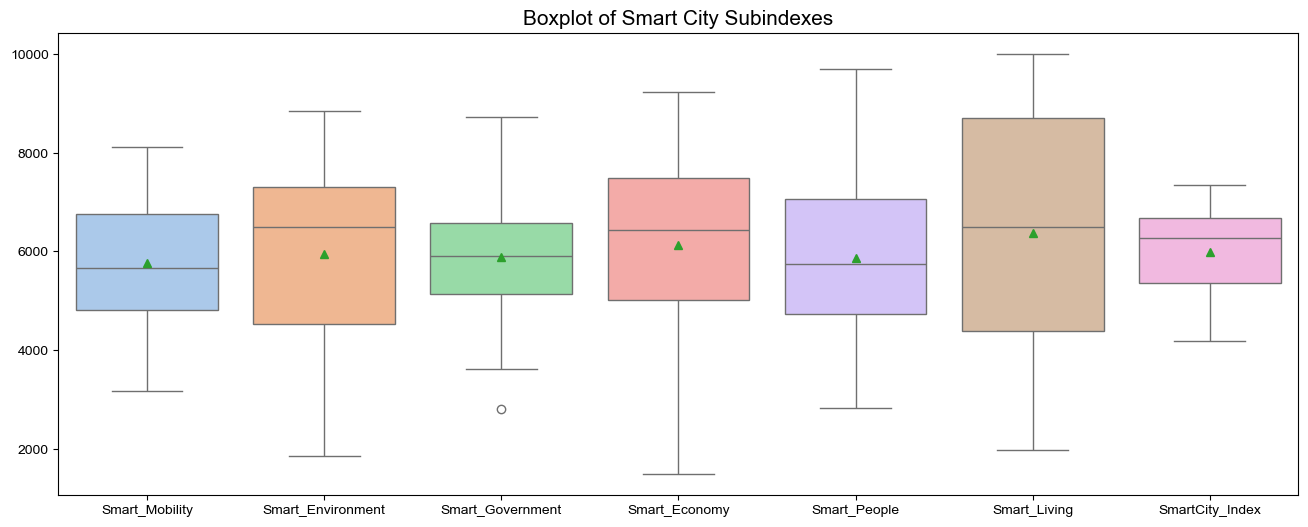

In [16]:
plt.figure(figsize=(16,6))
sns.boxplot(data=sci, showmeans=True, palette='pastel')
sns.set_style('whitegrid')
plt.title('Boxplot of Smart City Subindexes', fontsize = 15)

In [20]:
print(sci.dtypes)

numeric_cols = sci.select_dtypes(include=[np.number]).columns

scimean = sci.groupby('Country')[numeric_cols].median().astype(int).sort_values('SmartCity_Index', ascending=False).head(10)

scimean.style.background_gradient(cmap="GnBu")

City                 object
Country              object
Smart_Mobility        int64
Smart_Environment     int64
Smart_Government      int64
Smart_Economy         int64
Smart_People          int64
Smart_Living          int64
SmartCity_Index       int64
dtype: object


,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index
Country,,,,,,,
Netherlands,7540,5558,8528,8095,7098,7280,7311
Norway,6486,6989,7018,4925,7822,9090,7088
Canada,6727,4780,6510,6782,6930,9920,6866
Singapore,5790,4344,5560,5535,9695,10000,6813
Denmark,5876,8207,7540,5182,6386,7200,6803
Austria,5683,7608,6232,5415,8580,7500,6771
Sweden,4683,8296,7840,5980,6743,7730,6771
Switzerland,5326,8775,5591,6265,6425,7960,6707
Finland,5124,6519,6121,8155,5944,8710,6689


array([[<Axes: title={'center': 'Smart_Mobility'}>,
        <Axes: title={'center': 'Smart_Environment'}>,
        <Axes: title={'center': 'Smart_Government'}>],
       [<Axes: title={'center': 'Smart_Economy'}>,
        <Axes: title={'center': 'Smart_People'}>,
        <Axes: title={'center': 'Smart_Living'}>],
       [<Axes: title={'center': 'SmartCity_Index'}>, <Axes: >, <Axes: >]],
      dtype=object)

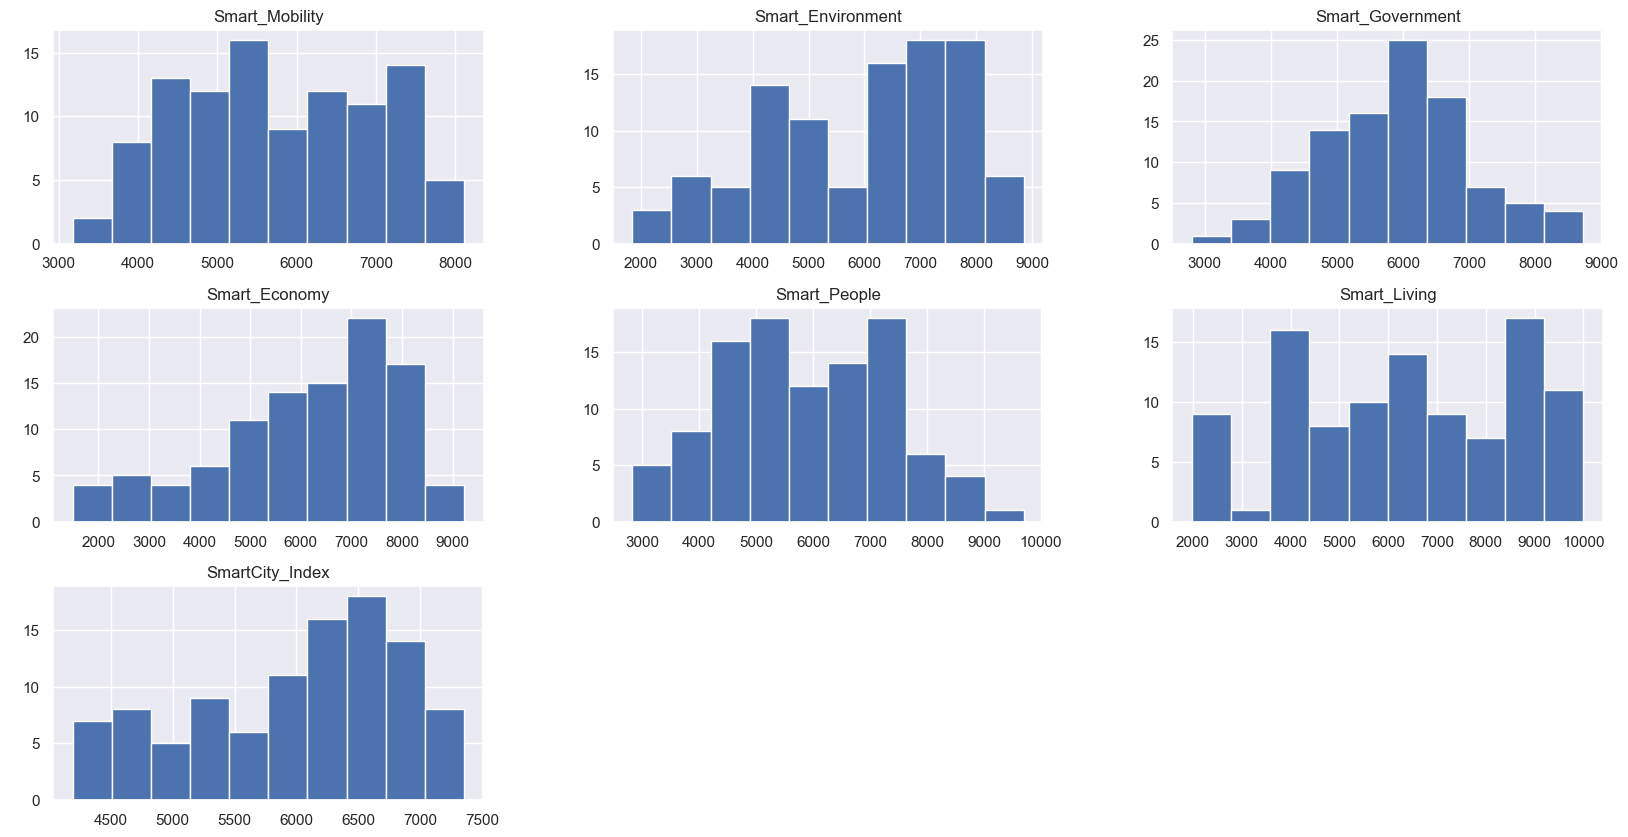

In [22]:
sns.set_theme()
scihist=sci.hist(figsize=(20, 10))
scihist

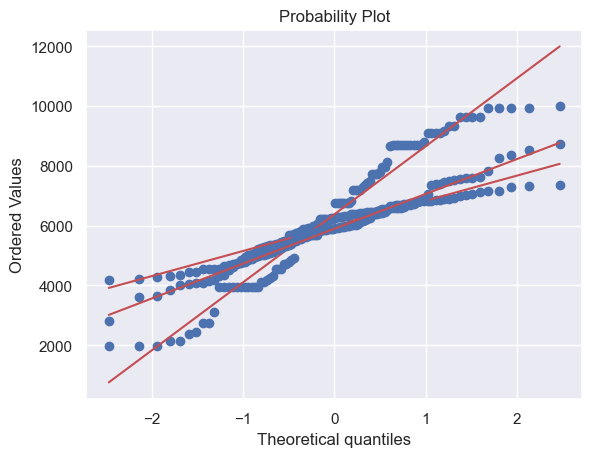

In [24]:
fig = plt.figure()
res1 = scipy.stats.probplot(sci['SmartCity_Index'], plot=plt)
res2 = scipy.stats.probplot(sci['Smart_Living'], plot=plt)
res3 = scipy.stats.probplot(sci['Smart_Government'], plot=plt)
plt.show()

<Figure size 800x1000 with 0 Axes>

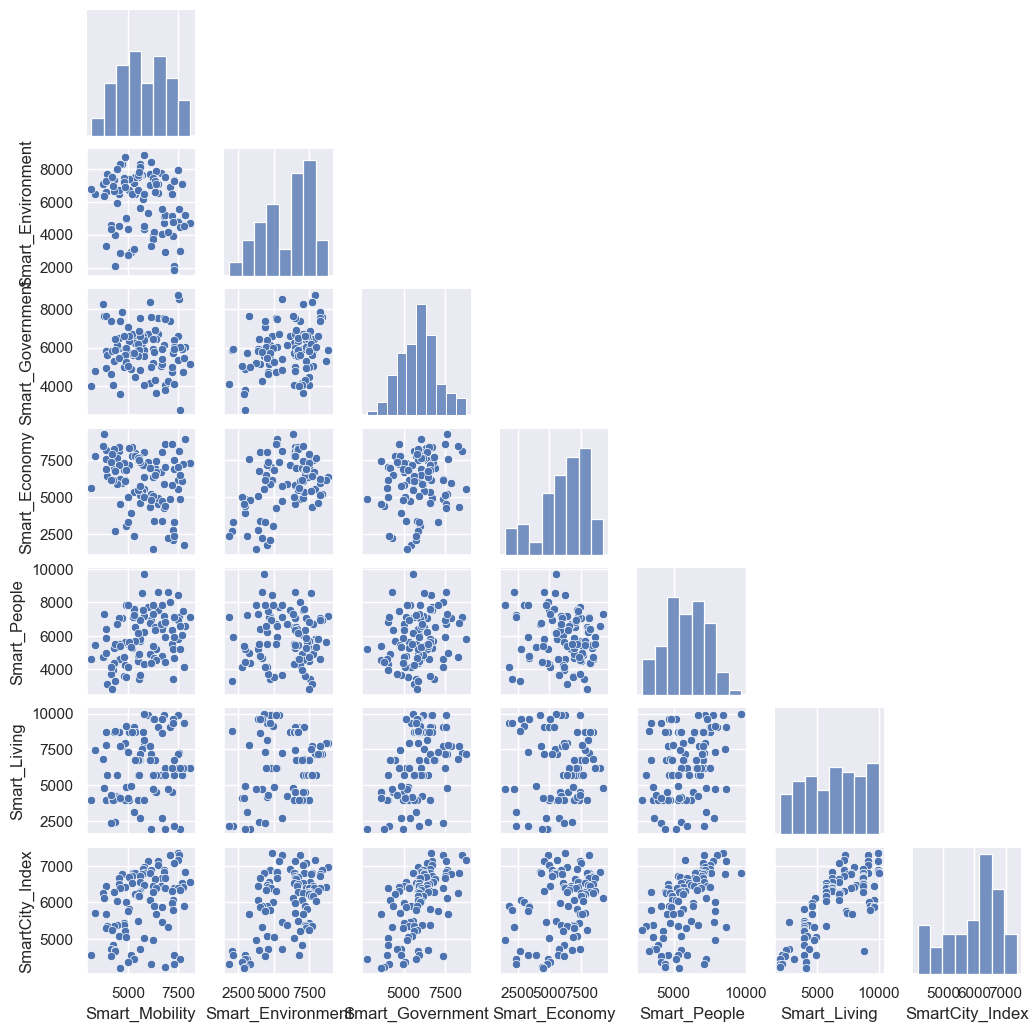

In [26]:
scicorr=sci.copy()
sns.set_theme()
plt.figure(figsize=(8, 10))
sns.pairplot(scicorr, kind='scatter', corner=True, height=1.5)
plt.show()

In [30]:
print(sci.dtypes)

numeric_cols = sci.select_dtypes(include=[np.number]).columns

corr = sci[numeric_cols].corr(method='spearman')

corrstyle = corr.style.background_gradient(cmap="GnBu").format('{:.2f}')

corrstyle

City                 object
Country              object
Smart_Mobility        int64
Smart_Environment     int64
Smart_Government      int64
Smart_Economy         int64
Smart_People          int64
Smart_Living          int64
SmartCity_Index       int64
dtype: object


,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index
Smart_Mobility,1.00,-0.19,-0.04,-0.26,0.35,0.14,0.34
Smart_Environment,-0.19,1.00,0.28,0.31,-0.05,0.04,0.40
Smart_Government,-0.04,0.28,1.00,0.17,0.26,0.44,0.60
Smart_Economy,-0.26,0.31,0.17,1.00,-0.12,0.05,0.32
Smart_People,0.35,-0.05,0.26,-0.12,1.00,0.33,0.56
Smart_Living,0.14,0.04,0.44,0.05,0.33,1.00,0.72
SmartCity_Index,0.34,0.40,0.60,0.32,0.56,0.72,1.00


Smart Living correlation to Smart City Index
Spearman`s coefficient: 0.7231501163735866
p-value: 9.251159080050792e-18
Smart Government correlation to Smart City Index
Spearman`s coefficient: 0.5787091458811844
p-value: 1.8815483349686238e-10
Smart People correlation to Smart City Index
Spearman`s coefficient: 0.5048054872977699
p-value: 6.293049869388648e-08
Smart Environment correlation to Smart City Index
Spearman`s coefficient: 0.5134410438856596
p-value: 3.42158494386943e-08


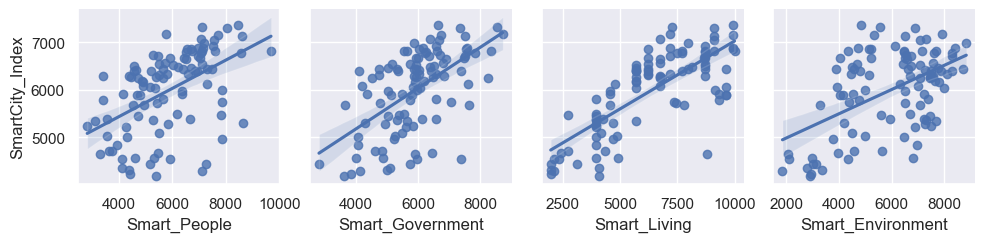

In [32]:
res= scipy.stats.spearmanr(sci['SmartCity_Index'], sci['Smart_Living'])
print('Smart Living correlation to Smart City Index')
print('Spearman`s coefficient:', res[0])
print('p-value:', res[1])

res= scipy.stats.pearsonr(sci['SmartCity_Index'], sci['Smart_Government'])
print('Smart Government correlation to Smart City Index')
print('Spearman`s coefficient:', res[0])
print('p-value:', res[1])

res= scipy.stats.pearsonr(sci['SmartCity_Index'], sci['Smart_People'])
print('Smart People correlation to Smart City Index')
print('Spearman`s coefficient:', res[0])
print('p-value:', res[1])

res= scipy.stats.pearsonr(sci['SmartCity_Index'], sci['Smart_Environment'])
print('Smart Environment correlation to Smart City Index')
print('Spearman`s coefficient:', res[0])
print('p-value:', res[1])

g = sns.PairGrid(sci, y_vars=['SmartCity_Index'], x_vars=['Smart_People', 'Smart_Government', 'Smart_Living', 'Smart_Environment'])
g.map(sns.regplot)
g.set()